# Чемпионат: Республика Якутия

In [1]:
# Импорт основных библиотек
import numpy as np
import pandas as pd

# Импорт библиотек построения графиков и диаграмм
from matplotlib import pyplot as plt
import seaborn as sns

# Указание режима отображения диаграмм
%matplotlib inline

# Импорт основных библиотек машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.preprocessing import MinMaxScaler

# Импорт библиотек моделей машинного обучения
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.cluster import DBSCAN
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Импорт библиотек отбора признаков
from sklearn.feature_selection import RFE

# Импорт библиотек оценки моделей машинного обучения
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

from sklearn import preprocessing

# Импорт библиотек добавление синтетических данных
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 

from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [2]:
train_df = pd.read_csv('train_dataset_train.csv')
test_df = pd.read_csv('test_dataset_test.csv') 
calls_df = pd.read_csv('Calls.csv')
connection_df = pd.read_csv('ConnectionTime.csv')
educatin_df = pd.read_csv('Education.csv')

C:\Users\lutfu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
skud_df = pd.read_csv('SKUD.csv')
tasks_df = pd.read_csv('Tasks.csv')
time_df = pd.read_csv('TimenNetwork.csv')
working_df = pd.read_csv('WorkingDay.csv')

C:\Users\lutfu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Описание входных значений:


***Calls.csv*** — файл, содержащий данные о звонках
- Date: дата звонка;
- Calltime: длительность звонка в часах;
- NumberOfCalls: количество звонков;
- Вид учета времени: будни/выходные;
- InOut: входящий или исходящий звонок (ToUser: входящий, FromUser:
исходящий);
- ID: уникальный номер сотрудника

***ConnectionTime.csv*** — определение опозданий по данным
- dateNum: дата;
- maxLogOff: последний выход из сети;
- Нормативное время начала раб.дня: время начала рабочего дня
согласно должности и часового пояса;
- Фактич. время начала раб.дня: фактическое время начала рабочего дня
- Время опоздания: длительность опоздания;
- Признак опоздания: опоздание или нет;
- Вых/Будни: выходной или будний день;
- ID: уникальный номер сотрудника.

***Education.csv*** — файл, содержащий данные об образовании сотрудников:
- Табельный номер руководителя;
- Табельный номер сотрудника;
- ID: уникальный номер сотрудника.
- Специальность: название специальности.

***SKUD.csv*** — файл, содержащий данные прихода/ухода сотрудников на
рабочее место
- Дата: дата входа/выхода в офис;
- Приход.1: первый вход;
- Уход.1: последний выход:
- Длительность общая: длительность пребывания в офисе;
- Длительность раб.дня без обеда: длительность пребывания в офисе
без обеда;
- Вых/Будни: выходной или будний день:
- ID: уникальный номер сотрудника.

***Tasks.csv*** — файл, содержащий данные о исполнение задач:
- Статус по просрочке: без нарушения срока или с нарушением;
- Срок плановый: плановая дата завершения;
- Просрочено, дней: на сколько дней просрочено завершение задания;
- Длительность просрочки: без нарушения срока, более 30 дней, менее
30 дней, менее 7 дней;
- Вид документа: виды документа, связанного с заданием (СЗ, договор и
т.п.);
- Дата старта задания;
- Дата завершения задания плановая;
- Дата завершения задания фактическая;
- Состояние задания:
- завершено – завершенное задание,
- на приёмке, на проверке – завершенное, но еще не принятое
контролёром задание,
- делегировано – передано другому сотруднику,
- все остальные состояния означают, что задание не завершено.
- ID: уникальный номер сотрудника.

***TimenNetwork.csv*** — интервалы времени в сети в системе учета рабочего
времени сотрудника за компьютером
- Вых/Будни: выходной или будний день;
- monitorTime: общее время активности пользователя в сети;
- startTime: дата старта активности;
- ID: уникальный номер сотрудника.

***WorkingDay.csv*** — файл, содержащий интервалы времени активности
система учета рабочего времени сотрудника за компьютером
- startTime: дата старта активности;
- activeTime: активное время (пользователь активно пользуется мышью и
клавиатурой);
- Вых/Будни: выходной или будний день;
- monitorTime: общее время активности пользователя;
- ID: уникальный номер сотрудника.

***train.csv*** — файл, содержащий данные сотрудников с типом повышения для
тренировки;
- "Перевод по должности": 0,
- "Перевод по подразделению с сохранением должности": 1,
- "Перевод и по подразделению и по должности":2,
- "Перевод с сохранением должности и подразделения":3

***test.csv*** — пример файла для отправки, содержит id работников, для которых
требуется предсказать тип повышения.

- Перевод с сохранением должности и подразделения - это когда остался на том же месте, но изменился оклад. 

- Перевод по подразделению - это, когда человек перешёл в другое подразделение на ту же должность. Например, появился новый отдел и его туда пригласили.

- Перевод по должности - это когда перешёл на другую должность

- Перевод по должности и подразделению - это когда перешел в другое подразделение на новую должность

In [4]:
## 
calls_df

,Date,CallTime,NumberOfCalls,Вид учета времени,InOut,id
0,"2021-08-16 00:00:00,000","0,00027777777777777778",1,Будни,ToUser,ОРГ1-01945
1,"2021-09-21 00:00:00,000","0,00027777777777777778",1,Будни,ToUser,ОРГ1-01945
2,"2021-01-11 00:00:00,000","0,00027777777777777778",1,Будни,ToUser,ОРГ1-01945
3,"2021-01-18 00:00:00,000","0,00027777777777777778",1,Будни,ToUser,ОРГ1-01945
4,"2021-01-27 00:00:00,000","0,00027777777777777778",1,Будни,ToUser,ОРГ1-01945
...,...,...,...,...,...,...
407862,"2021-11-02 00:00:00,000","0,0013888888888888889",2,Будни,ToUser,ОРГ1-02152
407863,"2021-11-30 00:00:00,000","0,0013888888888888889",2,Будни,ToUser,ОРГ1-01681
407864,"2021-12-02 00:00:00,000","0,0013888888888888889",2,Будни,ToUser,ОРГ1-01945
407865,"2021-12-15 00:00:00,000","0,0013888888888888889",2,Будни,ToUser,ОРГ1-00933


In [5]:
## Преобразуем типы Столбцов в "правильные"  типы
calls_df["CallTime"] = calls_df['CallTime'].replace(to_replace=r'\,', value='.', regex=True).astype(float)
calls_df['Date'] = pd.to_datetime(calls_df['Date'])

In [6]:
# Микро результаты:
# Всего 364 дня
# Входящий и исходящий примерно 200к 
# Звонки в будни - 384к, выходные - 8к
# Всего пользоватлей  1071
# Средняя продолжительность звоноков всех сотрудников 0.18 часа
## Среднее кол-во звонков 4-5


In [7]:
## Приход\уход сотрудника
skud_df

,Дата,Приход.1,Уход.1,Длительность общая,Длительность раб.дня без обеда,Вых/Будни,id
0,"2021-03-01 00:00:00,000","1899-12-30 08:11:00,000","1899-12-30 17:32:00,000","9,35","8,35",Будни,ОРГ1-00791
1,"2021-03-01 00:00:00,000","1899-12-30 08:25:00,000","1899-12-30 17:32:00,000","9,1166666666666671","8,1166666666666671",Будни,ОРГ1-01826
2,"2021-03-01 00:00:00,000","1899-12-30 08:31:00,000","1899-12-30 17:32:00,000","9,0166666666666657","8,0166666666666657",Будни,ОРГ1-00713
3,"2021-03-01 00:00:00,000","1899-12-30 08:31:00,000","1899-12-30 17:32:00,000","9,0166666666666657","8,0166666666666657",Будни,ОРГ1-02127
4,"2021-03-01 00:00:00,000","1899-12-30 08:19:00,000","1899-12-30 17:32:00,000","9,2166666666666668","8,2166666666666668",Будни,ОРГ1-01739
...,...,...,...,...,...,...,...
22575,"2021-04-11 00:00:00,000","1899-12-30 20:06:00,000","1899-12-30 20:34:00,000","0,46666666666666667","0,46666666666666667",Выходные дни,ОРГ1-02181
22576,"2021-04-11 00:00:00,000","1899-12-30 12:35:00,000","1899-12-30 16:46:00,000","4,1833333333333336","4,1833333333333336",Выходные дни,ОРГ1-01884
22577,"2021-04-11 00:00:00,000","1899-12-30 12:32:00,000","1899-12-30 21:16:00,000","8,7333333333333325","7,7333333333333325",Выходные дни,ОРГ1-01173
22578,"2021-04-11 00:00:00,000","1899-12-30 16:19:00,000","1899-12-30 17:32:00,000","1,2166666666666666","1,2166666666666666",Выходные дни,ОРГ1-00525


In [8]:
## Есть большик дни просрочки
# 

## Обработка таблиц

In [9]:
# Соединим таблицы тестовой с обучающей выборкой
df = pd.concat([train_df, test_df])
df

,id,type
0,ОРГ1-02050,2
1,ОРГ1-02783,2
2,ОРГ2-06173,0
3,ОРГ2-05359,2
4,ОРГ1-00803,2
...,...,...
257,ОРГ1-02893,0
258,ОРГ2-01077,0
259,ОРГ1-00469,0
260,ОРГ1-02060,0


### Признак ID: думаю очень важен:

In [10]:
# Признак относится ли ID сотрудника к ОРГ1, да =1, нет - 0
df['ОРГ1'] = np.where(df['id'].str.contains('ОРГ1', case = False, na=False,  regex= True), 1, 0 )

In [11]:
df

,id,type,ОРГ1
0,ОРГ1-02050,2,1
1,ОРГ1-02783,2,1
2,ОРГ2-06173,0,0
3,ОРГ2-05359,2,0
4,ОРГ1-00803,2,1
...,...,...,...
257,ОРГ1-02893,0,1
258,ОРГ2-01077,0,0
259,ОРГ1-00469,0,1
260,ОРГ1-02060,0,1


### Таблица звонки

In [12]:
# Таблица звонки
calls_df

,Date,CallTime,NumberOfCalls,Вид учета времени,InOut,id
0,2021-08-16,0.000278,1,Будни,ToUser,ОРГ1-01945
1,2021-09-21,0.000278,1,Будни,ToUser,ОРГ1-01945
2,2021-01-11,0.000278,1,Будни,ToUser,ОРГ1-01945
3,2021-01-18,0.000278,1,Будни,ToUser,ОРГ1-01945
4,2021-01-27,0.000278,1,Будни,ToUser,ОРГ1-01945
...,...,...,...,...,...,...
407862,2021-11-02,0.001389,2,Будни,ToUser,ОРГ1-02152
407863,2021-11-30,0.001389,2,Будни,ToUser,ОРГ1-01681
407864,2021-12-02,0.001389,2,Будни,ToUser,ОРГ1-01945
407865,2021-12-15,0.001389,2,Будни,ToUser,ОРГ1-00933


In [13]:
#добавим признак общее кол-во звонков
df = pd.merge(df, calls_df.groupby(['id'], as_index=False)['NumberOfCalls'].sum(), on = 'id', how='left')

In [14]:
#добавим признак количество звонков в будни и  выходные дни

# будни 
df = pd.merge(df, calls_df[calls_df['Вид учета времени']=='Будни'].groupby(['id'],as_index=False)['NumberOfCalls'].sum(), on = 'id', how='left')
## выходные дни
df = pd.merge(df, calls_df[calls_df['Вид учета времени']=='Выходные дни'].groupby(['id'],as_index=False)['NumberOfCalls'].sum(), on = 'id', how='left')

In [15]:
## Суммарное время в звонках в выходные и будние дни
df = pd.merge(df, calls_df[calls_df['Вид учета времени']=='Будни'].groupby(['id'],as_index=False)['CallTime'].sum(), on = 'id', how='left')

## выходные дни
df = pd.merge(df, calls_df[calls_df['Вид учета времени']=='Выходные дни'].groupby(['id'],as_index=False)['CallTime'].sum(), on = 'id', how='left')

In [16]:
## Средняя продолжительность звонка в будни:
df = pd.merge(df, calls_df[calls_df['Вид учета времени']=='Будни'].groupby(['id'],as_index=False)['CallTime'].mean(), on = 'id', how='left')
## в выходной день
df = pd.merge(df, calls_df[calls_df['Вид учета времени']=='Выходные дни'].groupby(['id'],as_index=False)['CallTime'].mean(), on = 'id', how='left')

C:\Users\lutfu\AppData\Local\Temp/ipykernel_13100/3954440043.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'CallTime_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, calls_df[calls_df['Вид учета времени']=='Выходные дни'].groupby(['id'],as_index=False)['CallTime'].mean(), on = 'id', how='left')


In [17]:
## Кол-во входящих звонков в будни:
df = pd.merge(df, calls_df[(calls_df['Вид учета времени']=='Будни')&(calls_df['InOut']=='ToUser')].groupby(['id'],as_index=False)['InOut'].count(), on = 'id', how='left')

# выходные дни
df = pd.merge(df, calls_df[(calls_df['Вид учета времени']=='Выходные дни')&(calls_df['InOut']=='ToUser')].groupby(['id'],as_index=False)['InOut'].count(), on = 'id', how='left')


In [18]:
calls_df['InOut'].unique()

array(['ToUser', 'FromUser'], dtype=object)

In [19]:
## Кол-во исходящих звонков в будни:
df = pd.merge(df, calls_df[(calls_df['Вид учета времени']=='Будни')&(calls_df['InOut']=='FromUser')].groupby(['id'],as_index=False)['InOut'].count(), on = 'id', how='left')

# выходные дни
df = pd.merge(df, calls_df[(calls_df['Вид учета времени']=='Выходные дни')&(calls_df['InOut']=='FromUser')].groupby(['id'],as_index=False)['InOut'].count(), on = 'id', how='left')


C:\Users\lutfu\AppData\Local\Temp/ipykernel_13100/1894338480.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'InOut_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, calls_df[(calls_df['Вид учета времени']=='Выходные дни')&(calls_df['InOut']=='FromUser')].groupby(['id'],as_index=False)['InOut'].count(), on = 'id', how='left')


In [20]:
## Средняя продолжительность входящего звонка в будни:
df = pd.merge(df, calls_df[(calls_df['Вид учета времени']=='Будни')&(calls_df['InOut']=='ToUser')].groupby(['id'],as_index=False)['CallTime'].mean(), on = 'id', how='left')

## Средняя продолжительность исходящего звонка в будни
df = pd.merge(df, calls_df[(calls_df['Вид учета времени']=='Будни')&(calls_df['InOut']=='FromUser')].groupby(['id'],as_index=False)['CallTime'].mean(), on = 'id', how='left')


C:\Users\lutfu\AppData\Local\Temp/ipykernel_13100/3424862603.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'CallTime_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, calls_df[(calls_df['Вид учета времени']=='Будни')&(calls_df['InOut']=='FromUser')].groupby(['id'],as_index=False)['CallTime'].mean(), on = 'id', how='left')


In [21]:
df

,id,type,ОРГ1,NumberOfCalls_x,NumberOfCalls_y,NumberOfCalls,CallTime_x,CallTime_y,CallTime_x,CallTime_y,InOut_x,InOut_y,InOut_x,InOut_y,CallTime_x,CallTime_y
0,ОРГ1-02050,2,1,546.0,546.0,NaN,26.778333,NaN,0.178522,NaN,75.0,NaN,75.0,NaN,0.109659,0.247385
1,ОРГ1-02783,2,1,1902.0,1902.0,NaN,49.934722,NaN,0.120907,NaN,223.0,NaN,190.0,NaN,0.115688,0.127034
2,ОРГ2-06173,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ОРГ2-05359,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ОРГ1-00803,2,1,7.0,7.0,NaN,0.046389,NaN,0.015463,NaN,1.0,NaN,2.0,NaN,0.032500,0.006944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,ОРГ1-02893,0,1,1404.0,1357.0,47.0,38.189167,1.141944,0.103775,0.051907,218.0,11.0,150.0,11.0,0.117519,0.083800
808,ОРГ2-01077,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,ОРГ1-00469,0,1,5103.0,5103.0,NaN,127.484722,NaN,0.163442,NaN,496.0,NaN,284.0,NaN,0.139136,0.205891
810,ОРГ1-02060,0,1,1251.0,1248.0,3.0,23.959722,0.020833,0.071522,0.010417,205.0,1.0,130.0,1.0,0.061436,0.087425


In [22]:
## Признак: разбить на 12 периодо( можно месяцев), подсчитать там характеристики 


### Таблица Опоздания:

In [23]:
connection_df

,dateNum,maxLogOff,Нормативное время начала раб.дня,Фактич. время начала раб.дня,Время опоздания,Признак опоздания,Вых/Будни,id
0,"2021-12-15 00:00:00,000","2021-12-15 17:30:27,246","1899-12-30 08:30:00,000","1899-12-30 08:24:18,606",NaN,NaN,Будни,ОРГ1-02782
1,"2021-12-15 00:00:00,000","2021-12-15 16:30:13,330","1899-12-30 08:30:00,000","1899-12-30 01:05:20,513",NaN,NaN,Будни,ОРГ1-01407
2,"2021-12-15 00:00:00,000","2021-12-15 15:27:37,246","1899-12-30 08:30:00,000","1899-12-30 05:47:33,156",NaN,NaN,Будни,ОРГ1-01909
3,"2021-12-15 00:00:00,000","2021-12-15 20:35:14,833","1899-12-30 08:30:00,000","1899-12-30 08:28:43,956",NaN,NaN,Будни,ОРГ1-00254
4,"2021-12-15 00:00:00,000","2021-12-15 17:32:16,913","1899-12-30 08:30:00,000","1899-12-30 08:16:02,896",NaN,NaN,Будни,ОРГ1-02543
...,...,...,...,...,...,...,...,...
230657,"2021-09-13 00:00:00,000","2021-09-13 10:45:06,233","1899-12-30 08:30:00,000","1899-12-30 10:25:05,960","1,918322222222222",Опоздание,Будни,ОРГ1-02975
230658,"2021-09-13 00:00:00,000","2021-09-13 17:25:31,043","1899-12-30 08:30:00,000","1899-12-30 08:41:46,136","0,19614916666666665",Опоздание,Будни,ОРГ2-05858
230659,"2021-09-13 00:00:00,000","2021-09-13 15:26:54,683","1899-12-30 08:30:00,000","1899-12-30 15:16:42,576","6,7784936111111112",Опоздание,Будни,ОРГ2-06145
230660,"2021-09-13 00:00:00,000","2021-09-13 17:41:13,460","1899-12-30 08:30:00,000","1899-12-30 11:05:30,300","2,5917499999999998",Опоздание,Будни,ОРГ2-06122


In [24]:
connection_df['Время опоздания'] = connection_df['Время опоздания'].replace(to_replace=r'\,', value='.',regex=True).astype(float)

connection_df['Нормативное время начала раб.дня'] = pd.to_datetime(connection_df['Нормативное время начала раб.дня'])
connection_df['Фактич. время начала раб.дня'] = pd.to_datetime(connection_df['Фактич. время начала раб.дня'])
connection_df['maxLogOff'] = pd.to_datetime(connection_df['maxLogOff'])



In [25]:
connection_df

,dateNum,maxLogOff,Нормативное время начала раб.дня,Фактич. время начала раб.дня,Время опоздания,Признак опоздания,Вых/Будни,id
0,"2021-12-15 00:00:00,000",2021-12-15 17:30:27.246,1899-12-30 08:30:00,1899-12-30 08:24:18.606,NaN,NaN,Будни,ОРГ1-02782
1,"2021-12-15 00:00:00,000",2021-12-15 16:30:13.330,1899-12-30 08:30:00,1899-12-30 01:05:20.513,NaN,NaN,Будни,ОРГ1-01407
2,"2021-12-15 00:00:00,000",2021-12-15 15:27:37.246,1899-12-30 08:30:00,1899-12-30 05:47:33.156,NaN,NaN,Будни,ОРГ1-01909
3,"2021-12-15 00:00:00,000",2021-12-15 20:35:14.833,1899-12-30 08:30:00,1899-12-30 08:28:43.956,NaN,NaN,Будни,ОРГ1-00254
4,"2021-12-15 00:00:00,000",2021-12-15 17:32:16.913,1899-12-30 08:30:00,1899-12-30 08:16:02.896,NaN,NaN,Будни,ОРГ1-02543
...,...,...,...,...,...,...,...,...
230657,"2021-09-13 00:00:00,000",2021-09-13 10:45:06.233,1899-12-30 08:30:00,1899-12-30 10:25:05.960,1.918322,Опоздание,Будни,ОРГ1-02975
230658,"2021-09-13 00:00:00,000",2021-09-13 17:25:31.043,1899-12-30 08:30:00,1899-12-30 08:41:46.136,0.196149,Опоздание,Будни,ОРГ2-05858
230659,"2021-09-13 00:00:00,000",2021-09-13 15:26:54.683,1899-12-30 08:30:00,1899-12-30 15:16:42.576,6.778494,Опоздание,Будни,ОРГ2-06145
230660,"2021-09-13 00:00:00,000",2021-09-13 17:41:13.460,1899-12-30 08:30:00,1899-12-30 11:05:30.300,2.591750,Опоздание,Будни,ОРГ2-06122


In [26]:
## Суммарное количество опозданий сотрудника:

df = pd.merge(df,connection_df[connection_df['Признак опоздания']=='Опоздание'].groupby(['id'], as_index=False)['Признак опоздания'].count(), on = 'id', how='left')

In [27]:
connection_df['Признак опоздания'].unique()

array([nan, 'Опоздание'], dtype=object)

In [28]:
## Суммарное количество опозданий сотрудника в будние дни:
df = pd.merge(df,connection_df[(connection_df['Вых/Будни']=='Будни')&(connection_df['Признак опоздания']=='Опоздание')].groupby(['id'],as_index=False)['Признак опоздания'].count(), on = 'id', how='left')


In [29]:
## Суммарное время опозданий сотрудника:
df = pd.merge(df,connection_df[connection_df['Признак опоздания']=='Опоздание'].groupby(['id'],as_index=False)['Время опоздания'].sum(), on = 'id', how='left')


In [30]:
## Суммарное время опозданий сотрудника за будние дни:

df = pd.merge(df,connection_df[(connection_df['Признак опоздания']=='Опоздание')&(connection_df['Вых/Будни']=='Будни')].groupby(['id'],as_index=False)['Время опоздания'].sum(), on = 'id', how='left')

In [31]:
df

,id,type,ОРГ1,NumberOfCalls_x,NumberOfCalls_y,NumberOfCalls,CallTime_x,CallTime_y,CallTime_x,CallTime_y,InOut_x,InOut_y,InOut_x,InOut_y,CallTime_x,CallTime_y,Признак опоздания_x,Признак опоздания_y,Время опоздания_x,Время опоздания_y
0,ОРГ1-02050,2,1,546.0,546.0,NaN,26.778333,NaN,0.178522,NaN,75.0,NaN,75.0,NaN,0.109659,0.247385,5.0,5.0,17.326990,17.326990
1,ОРГ1-02783,2,1,1902.0,1902.0,NaN,49.934722,NaN,0.120907,NaN,223.0,NaN,190.0,NaN,0.115688,0.127034,7.0,4.0,42.524941,11.991905
2,ОРГ2-06173,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,21.0,91.070104,90.838534
3,ОРГ2-05359,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,26.725031,26.725031
4,ОРГ1-00803,2,1,7.0,7.0,NaN,0.046389,NaN,0.015463,NaN,1.0,NaN,2.0,NaN,0.032500,0.006944,35.0,33.0,149.613757,135.770319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,ОРГ1-02893,0,1,1404.0,1357.0,47.0,38.189167,1.141944,0.103775,0.051907,218.0,11.0,150.0,11.0,0.117519,0.083800,117.0,110.0,642.751389,610.604005
808,ОРГ2-01077,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,18.0,73.411340,33.131085
809,ОРГ1-00469,0,1,5103.0,5103.0,NaN,127.484722,NaN,0.163442,NaN,496.0,NaN,284.0,NaN,0.139136,0.205891,2.0,1.0,9.737531,0.954362
810,ОРГ1-02060,0,1,1251.0,1248.0,3.0,23.959722,0.020833,0.071522,0.010417,205.0,1.0,130.0,1.0,0.061436,0.087425,1.0,1.0,6.177131,6.177131


In [32]:
## Среднее время опоздания сотрудника за будние дни:
df['Среднее_время_опоздания'] = df['Время опоздания_y']/df['Признак опоздания_y']

In [33]:
df.isnull().sum()

id                           0
type                         0
ОРГ1                         0
NumberOfCalls_x            331
NumberOfCalls_y            345
NumberOfCalls              564
CallTime_x                 345
CallTime_y                 564
CallTime_x                 345
CallTime_y                 564
InOut_x                    383
InOut_y                    590
InOut_x                    346
InOut_y                    600
CallTime_x                 383
CallTime_y                 346
Признак опоздания_x         91
Признак опоздания_y         94
Время опоздания_x           91
Время опоздания_y           94
Среднее_время_опоздания     94
dtype: int64

In [34]:
#### ЕЩЕ можно какие-то признаки добавить

### Таблица образование

In [35]:
## Данные об образовании
educatin_df

,Табельный номер руководителя,id,Вид образования,Специальность
0,NaN,ОРГ1-00131,Высшее образование - бакалавриат,Юриспруденция
1,NaN,ОРГ1-03220,Среднее профессиональное образование,Финансы
2,NaN,ОРГ1-03008,Высшее образование,Юриспруденция
3,NaN,ОРГ1-00922,Высшее образование - бакалавриат,Бакалавр технических наук
4,NaN,ОРГ1-00922,Высшее образование,Машины и аппараты химических производств и пре...
...,...,...,...,...
5604,ОРГ2-09100,ОРГ2-08601,Начальное профессиональное образование,Специалист сварочного производства I уровня
5605,ОРГ2-09100,ОРГ2-08622,Начальное профессиональное образование,NaN
5606,ОРГ2-09100,ОРГ2-04773,Среднее профессиональное образование,"Дефектоскопист рентгено-, гаммаграфирования"
5607,ОРГ2-09100,ОРГ2-05048,"Высшее образование - специалитет, магистратура",Управление и информатика в технических системах


In [36]:
educatin_df.groupby(['id', 'Вид образования'], as_index=False).count()

,id,Вид образования,Табельный номер руководителя,Специальность
0,ОРГ1-00001,Высшее образование,0,1
1,ОРГ1-00001,Повышение квалификации,0,2
2,ОРГ1-00004,Высшее образование,1,1
3,ОРГ1-00004,Повышение квалификации,5,2
4,ОРГ1-00005,Высшее образование,1,1
...,...,...,...,...
5243,ОРГ2-09282,"Высшее образование - специалитет, магистратура",0,1
5244,ОРГ2-09283,Высшее образование,1,1
5245,ОРГ2-09284,Начальное профессиональное образование,1,1
5246,ОРГ2-09285,Высшее образование,0,1


In [37]:
educatin_df['Вид образования'].value_counts()

Высшее образование                                1440
Среднее профессиональное образование              1009
Среднее общее образование                          620
Начальное профессиональное образование             573
Профессиональное обучение                          497
Повышение квалификации                             392
Высшее образование - бакалавриат                   365
Высшее образование - специалитет, магистратура     327
Среднее (полное) общее образование                 111
Основное общее образование                          66
Переподготовка                                      52
Дополнительное профессиональное образование         23
Неполное высшее образование                         21
Аспирантура                                          6
Начальное общее образование                          6
Послевузовское образование                           2
Name: Вид образования, dtype: int64

In [38]:
df

,id,type,ОРГ1,NumberOfCalls_x,NumberOfCalls_y,NumberOfCalls,CallTime_x,CallTime_y,CallTime_x,CallTime_y,...,InOut_y,InOut_x,InOut_y,CallTime_x,CallTime_y,Признак опоздания_x,Признак опоздания_y,Время опоздания_x,Время опоздания_y,Среднее_время_опоздания
0,ОРГ1-02050,2,1,546.0,546.0,NaN,26.778333,NaN,0.178522,NaN,...,NaN,75.0,NaN,0.109659,0.247385,5.0,5.0,17.326990,17.326990,3.465398
1,ОРГ1-02783,2,1,1902.0,1902.0,NaN,49.934722,NaN,0.120907,NaN,...,NaN,190.0,NaN,0.115688,0.127034,7.0,4.0,42.524941,11.991905,2.997976
2,ОРГ2-06173,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.0,21.0,91.070104,90.838534,4.325644
3,ОРГ2-05359,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,6.0,26.725031,26.725031,4.454172
4,ОРГ1-00803,2,1,7.0,7.0,NaN,0.046389,NaN,0.015463,NaN,...,NaN,2.0,NaN,0.032500,0.006944,35.0,33.0,149.613757,135.770319,4.114252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,ОРГ1-02893,0,1,1404.0,1357.0,47.0,38.189167,1.141944,0.103775,0.051907,...,11.0,150.0,11.0,0.117519,0.083800,117.0,110.0,642.751389,610.604005,5.550945
808,ОРГ2-01077,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29.0,18.0,73.411340,33.131085,1.840616
809,ОРГ1-00469,0,1,5103.0,5103.0,NaN,127.484722,NaN,0.163442,NaN,...,NaN,284.0,NaN,0.139136,0.205891,2.0,1.0,9.737531,0.954362,0.954362
810,ОРГ1-02060,0,1,1251.0,1248.0,3.0,23.959722,0.020833,0.071522,0.010417,...,1.0,130.0,1.0,0.061436,0.087425,1.0,1.0,6.177131,6.177131,6.177131


In [39]:
## высшее образование
higher_education = ['Высшее образование', 'Высшее образование - бакалавриат', 'Высшее образование - специалитет, магистратура',
                    'Аспирантура', 'Послевузовское образование', 'Неполное высшее образование']


In [40]:
## Среднее проффессиональное
professional_education = ['Среднее профессиональное образование',  'Начальное профессиональное образование']


In [41]:
# Общее образование
secondary_education = ['Среднее общее образование', 'Среднее (полное) общее образование', 'Основное общее образование',
                      'Начальное общее образование']


In [42]:
## Переподготовка/дополнительное 
additional_education = ['Повышение квалификации', 'Переподготовка', 'Дополнительное профессиональное образование', 'Профессиональное обучение']


In [43]:
# Позволяет выбирать строки, значения которых входят в список
# df[np.isin(df, ['pear','apple']).any(axis=1)]
# df.isin([0, 2]) 
# df.isin({'num_wings': [0, 3]}) - если отбор происходит  в столбце 

In [44]:
# Отбирает строки, в которых значения столбца Вид образования входят в список higher_education
educatin_df[educatin_df.isin({'Вид образования': higher_education }).any(axis=1)]

,Табельный номер руководителя,id,Вид образования,Специальность
0,NaN,ОРГ1-00131,Высшее образование - бакалавриат,Юриспруденция
2,NaN,ОРГ1-03008,Высшее образование,Юриспруденция
3,NaN,ОРГ1-00922,Высшее образование - бакалавриат,Бакалавр технических наук
4,NaN,ОРГ1-00922,Высшее образование,Машины и аппараты химических производств и пре...
8,NaN,ОРГ1-00502,Высшее образование,Финансы и кредит
...,...,...,...,...
5575,ОРГ2-09100,ОРГ2-08541,Высшее образование,Дефектоскопист
5583,ОРГ2-09100,ОРГ2-02426,Неполное высшее образование,реклама в торговле
5590,ОРГ2-09100,ОРГ2-03089,"Высшее образование - специалитет, магистратура",Социально-культурный сервис и туризм
5591,ОРГ2-09100,ОРГ2-08176,"Высшее образование - специалитет, магистратура",Дефектоскопист по радиационному контролю


In [45]:
# Признак: количество высшего образования у сотрудника
df = pd.merge(df,educatin_df[educatin_df.isin({'Вид образования': higher_education }).any(axis=1)]
              .groupby(['id'],as_index=False)['Вид образования'].count(), on = 'id', how='left')



In [46]:
# Признак: количество профессинального образования у сотрудника
df = pd.merge(df,educatin_df[educatin_df.isin({'Вид образования': professional_education }).any(axis=1)]
              .groupby(['id'],as_index=False)['Вид образования'].count(), on = 'id', how='left')

In [47]:
# Признак: количество среднего образования у сотрудника
df = pd.merge(df,educatin_df[educatin_df.isin({'Вид образования': secondary_education }).any(axis=1)]
              .groupby(['id'],as_index=False)['Вид образования'].count(), on = 'id', how='left')

In [48]:
# Признак: количество Доп. образования у сотрудника
df = pd.merge(df,educatin_df[educatin_df.isin({'Вид образования': additional_education}).any(axis=1)]
              .groupby(['id'],as_index=False)['Вид образования'].count(), on = 'id', how='left')

C:\Users\lutfu\AppData\Local\Temp/ipykernel_13100/270754707.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Вид образования_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df,educatin_df[educatin_df.isin({'Вид образования': additional_education}).any(axis=1)]


In [49]:
educatin_df

,Табельный номер руководителя,id,Вид образования,Специальность
0,NaN,ОРГ1-00131,Высшее образование - бакалавриат,Юриспруденция
1,NaN,ОРГ1-03220,Среднее профессиональное образование,Финансы
2,NaN,ОРГ1-03008,Высшее образование,Юриспруденция
3,NaN,ОРГ1-00922,Высшее образование - бакалавриат,Бакалавр технических наук
4,NaN,ОРГ1-00922,Высшее образование,Машины и аппараты химических производств и пре...
...,...,...,...,...
5604,ОРГ2-09100,ОРГ2-08601,Начальное профессиональное образование,Специалист сварочного производства I уровня
5605,ОРГ2-09100,ОРГ2-08622,Начальное профессиональное образование,NaN
5606,ОРГ2-09100,ОРГ2-04773,Среднее профессиональное образование,"Дефектоскопист рентгено-, гаммаграфирования"
5607,ОРГ2-09100,ОРГ2-05048,"Высшее образование - специалитет, магистратура",Управление и информатика в технических системах


In [50]:
## Общее количество полученной СПЕЦАЛЬНОСТИ у сотрудника:
df = pd.merge(df, educatin_df.groupby(['id'], as_index=False)['Специальность'].count(), on='id', how='left' )

In [51]:
## Общее количество полученной Обраованиий у сотрудника:
df = pd.merge(df, educatin_df.groupby(['id'], as_index=False)['Вид образования'].count(), on='id', how='left' )

In [52]:
## Признак табельный номер руководителя:
# Добавим его в нашу основную таблицу

In [53]:
educatin_df

,Табельный номер руководителя,id,Вид образования,Специальность
0,NaN,ОРГ1-00131,Высшее образование - бакалавриат,Юриспруденция
1,NaN,ОРГ1-03220,Среднее профессиональное образование,Финансы
2,NaN,ОРГ1-03008,Высшее образование,Юриспруденция
3,NaN,ОРГ1-00922,Высшее образование - бакалавриат,Бакалавр технических наук
4,NaN,ОРГ1-00922,Высшее образование,Машины и аппараты химических производств и пре...
...,...,...,...,...
5604,ОРГ2-09100,ОРГ2-08601,Начальное профессиональное образование,Специалист сварочного производства I уровня
5605,ОРГ2-09100,ОРГ2-08622,Начальное профессиональное образование,NaN
5606,ОРГ2-09100,ОРГ2-04773,Среднее профессиональное образование,"Дефектоскопист рентгено-, гаммаграфирования"
5607,ОРГ2-09100,ОРГ2-05048,"Высшее образование - специалитет, магистратура",Управление и информатика в технических системах


In [54]:
## nunique() -- Подсчитает различные значения

In [55]:
## Количестов руководителей ,который имеет сотрудник:
df = pd.merge(df, educatin_df.groupby(['id'], as_index=False)['Табельный номер руководителя'].nunique(), on='id', how='left' )

In [56]:
df

,id,type,ОРГ1,NumberOfCalls_x,NumberOfCalls_y,NumberOfCalls,CallTime_x,CallTime_y,CallTime_x,CallTime_y,...,Время опоздания_x,Время опоздания_y,Среднее_время_опоздания,Вид образования_x,Вид образования_y,Вид образования_x,Вид образования_y,Специальность,Вид образования,Табельный номер руководителя
0,ОРГ1-02050,2,1,546.0,546.0,NaN,26.778333,NaN,0.178522,NaN,...,17.326990,17.326990,3.465398,2.0,NaN,NaN,NaN,2.0,2.0,0.0
1,ОРГ1-02783,2,1,1902.0,1902.0,NaN,49.934722,NaN,0.120907,NaN,...,42.524941,11.991905,2.997976,1.0,NaN,NaN,NaN,1.0,1.0,1.0
2,ОРГ2-06173,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.070104,90.838534,4.325644,1.0,NaN,NaN,NaN,1.0,1.0,1.0
3,ОРГ2-05359,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.725031,26.725031,4.454172,NaN,1.0,NaN,NaN,1.0,1.0,1.0
4,ОРГ1-00803,2,1,7.0,7.0,NaN,0.046389,NaN,0.015463,NaN,...,149.613757,135.770319,4.114252,1.0,NaN,NaN,NaN,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,ОРГ1-02893,0,1,1404.0,1357.0,47.0,38.189167,1.141944,0.103775,0.051907,...,642.751389,610.604005,5.550945,NaN,1.0,NaN,NaN,1.0,1.0,0.0
808,ОРГ2-01077,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.411340,33.131085,1.840616,1.0,NaN,NaN,NaN,1.0,1.0,1.0
809,ОРГ1-00469,0,1,5103.0,5103.0,NaN,127.484722,NaN,0.163442,NaN,...,9.737531,0.954362,0.954362,1.0,NaN,NaN,NaN,1.0,1.0,1.0
810,ОРГ1-02060,0,1,1251.0,1248.0,3.0,23.959722,0.020833,0.071522,0.010417,...,6.177131,6.177131,6.177131,1.0,NaN,NaN,NaN,1.0,1.0,0.0


In [57]:
## Добавим id руководителя у сотрудника:
df = pd.merge(df, educatin_df.groupby(['id', 'Табельный номер руководителя'], as_index=False).nunique().iloc[:, :2], on='id', how='left' )

In [58]:
## Является ли сотрудник чьим-то руководителем:
df['руководитель'] = np.where(df['id'] ==df['Табельный номер руководителя_y'], 1, 0 )

In [59]:
df

,id,type,ОРГ1,NumberOfCalls_x,NumberOfCalls_y,NumberOfCalls,CallTime_x,CallTime_y,CallTime_x,CallTime_y,...,Среднее_время_опоздания,Вид образования_x,Вид образования_y,Вид образования_x,Вид образования_y,Специальность,Вид образования,Табельный номер руководителя_x,Табельный номер руководителя_y,руководитель
0,ОРГ1-02050,2,1,546.0,546.0,NaN,26.778333,NaN,0.178522,NaN,...,3.465398,2.0,NaN,NaN,NaN,2.0,2.0,0.0,NaN,0
1,ОРГ1-02783,2,1,1902.0,1902.0,NaN,49.934722,NaN,0.120907,NaN,...,2.997976,1.0,NaN,NaN,NaN,1.0,1.0,1.0,ОРГ1-01974,0
2,ОРГ2-06173,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.325644,1.0,NaN,NaN,NaN,1.0,1.0,1.0,ОРГ2-01170,0
3,ОРГ2-05359,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.454172,NaN,1.0,NaN,NaN,1.0,1.0,1.0,ОРГ2-09100,0
4,ОРГ1-00803,2,1,7.0,7.0,NaN,0.046389,NaN,0.015463,NaN,...,4.114252,1.0,NaN,NaN,NaN,1.0,1.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,ОРГ1-02893,0,1,1404.0,1357.0,47.0,38.189167,1.141944,0.103775,0.051907,...,5.550945,NaN,1.0,NaN,NaN,1.0,1.0,0.0,NaN,0
808,ОРГ2-01077,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.840616,1.0,NaN,NaN,NaN,1.0,1.0,1.0,ОРГ2-09100,0
809,ОРГ1-00469,0,1,5103.0,5103.0,NaN,127.484722,NaN,0.163442,NaN,...,0.954362,1.0,NaN,NaN,NaN,1.0,1.0,1.0,ОРГ1-01974,0
810,ОРГ1-02060,0,1,1251.0,1248.0,3.0,23.959722,0.020833,0.071522,0.010417,...,6.177131,1.0,NaN,NaN,NaN,1.0,1.0,0.0,NaN,0


## Пропуски заполним следующем образом:
1) Если у человека есть высшее образование, значит есть и общее \
2) В других ситуациях пропуски будут означать отсутсвие соответсвующего образования

### Таблица прихода/ухода сотрудника 

In [60]:
## Таблица Прихо/уход сотрудника 
skud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Дата                            22580 non-null  object
 1   Приход.1                        22580 non-null  object
 2   Уход.1                          22580 non-null  object
 3   Длительность общая              22580 non-null  object
 4   Длительность раб.дня без обеда  22580 non-null  object
 5   Вых/Будни                       22580 non-null  object
 6   id                              22580 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB


In [61]:
## Преобрзование типов у некоторых столбцов
skud_df["Длительность общая"] = skud_df['Длительность общая'].replace(to_replace=r'\,', value='.', regex=True).astype(float)
skud_df['Длительность раб.дня без обеда'] = skud_df['Длительность раб.дня без обеда'].replace(to_replace=r'\,', value='.', regex=True).astype(float)
skud_df['Дата'] = pd.to_datetime(skud_df['Дата'])
skud_df['Приход.1'] = pd.to_datetime(skud_df['Приход.1'])
skud_df['Уход.1'] =pd.to_datetime(skud_df['Уход.1'])

In [62]:
skud_df

,Дата,Приход.1,Уход.1,Длительность общая,Длительность раб.дня без обеда,Вых/Будни,id
0,2021-03-01,1899-12-30 08:11:00,1899-12-30 17:32:00,9.350000,8.350000,Будни,ОРГ1-00791
1,2021-03-01,1899-12-30 08:25:00,1899-12-30 17:32:00,9.116667,8.116667,Будни,ОРГ1-01826
2,2021-03-01,1899-12-30 08:31:00,1899-12-30 17:32:00,9.016667,8.016667,Будни,ОРГ1-00713
3,2021-03-01,1899-12-30 08:31:00,1899-12-30 17:32:00,9.016667,8.016667,Будни,ОРГ1-02127
4,2021-03-01,1899-12-30 08:19:00,1899-12-30 17:32:00,9.216667,8.216667,Будни,ОРГ1-01739
...,...,...,...,...,...,...,...
22575,2021-04-11,1899-12-30 20:06:00,1899-12-30 20:34:00,0.466667,0.466667,Выходные дни,ОРГ1-02181
22576,2021-04-11,1899-12-30 12:35:00,1899-12-30 16:46:00,4.183333,4.183333,Выходные дни,ОРГ1-01884
22577,2021-04-11,1899-12-30 12:32:00,1899-12-30 21:16:00,8.733333,7.733333,Выходные дни,ОРГ1-01173
22578,2021-04-11,1899-12-30 16:19:00,1899-12-30 17:32:00,1.216667,1.216667,Выходные дни,ОРГ1-00525


In [63]:
## Общее количество отработаннх дней у сотрудника за будние дни

df = pd.merge(df, skud_df[skud_df['Вых/Будни']=='Будни'].groupby(['id'], as_index=False)['Уход.1'].count(), on='id', how ='left')

In [64]:
## Общее количество отработаннх дней  сотрудника за выходные дни
df = pd.merge(df, skud_df[skud_df['Вых/Будни']=='Выходные дни'].groupby(['id'], as_index=False)['Уход.1'].count(), on='id', how ='left')

In [65]:
## Средняя продолжительность будничного дня:
df = pd.merge(df, skud_df[skud_df['Вых/Будни']=='Будни'].groupby(['id'], as_index=False)['Длительность раб.дня без обеда'].mean(), on='id', how ='left')

# Выходного дня:
df = pd.merge(df, skud_df[skud_df['Вых/Будни']=='Выходные дни'].groupby(['id'], as_index=False)['Длительность раб.дня без обеда'].mean(), on='id', how ='left')

In [66]:
skud_df['Длительность_обеда'] = (skud_df['Длительность общая'] - skud_df['Длительность раб.дня без обеда'])

In [67]:
## Средння длительность обеда сотрудника в будние дни
df = pd.merge(df, skud_df[skud_df['Вых/Будни']=='Будни'].groupby(['id'], as_index=False)['Длительность_обеда'].mean(), on='id', how ='left')

## В выходные дин:
df = pd.merge(df, skud_df[skud_df['Вых/Будни']=='Выходные дни'].groupby(['id'], as_index=False)['Длительность_обеда'].mean(), on='id', how ='left')

In [68]:
## Добавить еще какие-то признаки

### Таблица об исполнении задач

In [69]:
tasks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536660 entries, 0 to 536659
Data columns (total 11 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Статус по просрочке                  536660 non-null  object
 1   Срок плановый                        15821 non-null   object
 2   Просрочено, дней                     536660 non-null  int64 
 3   ДлительностьПросрочки                536660 non-null  object
 4   ID задачи                            536660 non-null  object
 5   Вид документа                        533143 non-null  object
 6   Дата старта задания                  536660 non-null  object
 7   Дата завершения задания плановая     274057 non-null  object
 8   Дата завершения задания фактическая  520683 non-null  object
 9   Состояние задания                    536660 non-null  object
 10  id                                   536660 non-null  object
dtypes: int64(1), object(10)
me

In [70]:
## преобразуем типы в  столбцах
tasks_df['Дата старта задания'] = pd.to_datetime(tasks_df['Дата старта задания'])
tasks_df['Дата завершения задания плановая'] = pd.to_datetime(tasks_df['Дата завершения задания плановая'])
tasks_df['Дата завершения задания фактическая'] = pd.to_datetime(tasks_df['Дата завершения задания фактическая'])

In [71]:
tasks_df

,Статус по просрочке,Срок плановый,"Просрочено, дней",ДлительностьПросрочки,ID задачи,Вид документа,Дата старта задания,Дата завершения задания плановая,Дата завершения задания фактическая,Состояние задания,id
0,Без нарушения срока,NaN,0,без нарушения срока,E1DE844D-EE2D-4C41-AEDF-93F246749F0E,Служебная записка,2021-12-10,NaT,2021-12-10,Завершено,ОРГ1-02588
1,Без нарушения срока,NaN,0,без нарушения срока,7A92343C-8C9A-46E7-AC81-8F50F95009D0,Служебная записка,2021-12-10,NaT,2021-12-10,Завершено,ОРГ1-02588
2,Без нарушения срока,NaN,0,без нарушения срока,5CE64E52-D2D1-4DCC-B2C8-34734AA39AC0,Служебная записка,2021-12-10,NaT,2021-12-10,Завершено,ОРГ1-02588
3,Без нарушения срока,NaN,0,без нарушения срока,7A28F3DD-983F-4127-AB7F-6EDB85A69F1C,Служебная записка,2021-12-10,NaT,2021-12-10,Завершено,ОРГ1-02588
4,Без нарушения срока,NaN,0,без нарушения срока,ABFFAF61-12D8-44C2-B1F6-8402D174889E,Служебная записка,2021-12-10,NaT,2021-12-10,Завершено,ОРГ1-02588
...,...,...,...,...,...,...,...,...,...,...,...
536655,Без нарушения срока,NaN,0,без нарушения срока,9FE7B014-3015-4855-BD08-D3C5260FB122,Служебная записка,2021-10-31,2021-11-01,2021-10-31,Завершено,ОРГ2-02838
536656,Без нарушения срока,NaN,0,без нарушения срока,B4A7AE02-2D7E-4D56-A337-0F14C27A85CC,Служебная записка,2021-10-31,2021-11-01,2021-10-31,Завершено,ОРГ2-02838
536657,Без нарушения срока,NaN,0,без нарушения срока,698F3F66-37BA-4042-BDE9-5F8C8BEA7FA6,Служебная записка,2021-10-31,2021-11-01,2021-10-31,Завершено,ОРГ2-02838
536658,Без нарушения срока,NaN,0,без нарушения срока,A7D0F2FA-9C2A-4F4D-A990-ABE463A5F0D5,Служебная записка,2021-10-30,2021-11-01,2021-10-31,Завершено,ОРГ2-02838


In [72]:
## Общее количество задач, порученных сотруднику:
df = pd.merge(df, tasks_df.groupby(['id'], as_index=False)['ID задачи'].count(), on='id', how='left')


In [73]:
## Общее число просроченных дней сотруднкиа:
df = pd.merge(df, tasks_df.groupby(['id'], as_index=False)['Просрочено, дней'].sum(), on='id', how='left')


In [74]:
column = tasks_df['Вид документа'].unique()
column

array(['Служебная записка', 'Исходящий', 'Входящий',
       'Дополнительное соглашение', 'Договор', 'Внутренний документ',
       'Акт', 'Приказ', nan, 'Файл', 'Распоряжение', 'Протокол',
       'Запрос на внесение изменений', 'Отчет по ВА', 'Исходящий РМЗ',
       'Внутренний документ для БП синхронизация 1С'], dtype=object)

In [75]:
## Количество заданий, связанных с типом(видом) документа (Служебная записка, Исходящий, входящий, итд) НА ВЕРХУ:

for col in column:
    df = pd.merge(df, tasks_df[tasks_df['Вид документа']==col].groupby(['id'], as_index=False)['Вид документа'].count(), on='id', how='left')


C:\Users\lutfu\AppData\Local\Temp/ipykernel_13100/2401137568.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Вид документа_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, tasks_df[tasks_df['Вид документа']==col].groupby(['id'], as_index=False)['Вид документа'].count(), on='id', how='left')


In [76]:
## Количество задач, которые находятся в состоянии у сотрудника:
column1 = tasks_df['Состояние задания'].unique()

for col1 in column1:
    df = pd.merge(df, tasks_df[tasks_df['Состояние задания']==col1].groupby(['id'], as_index=False)['ID задачи'].count(), on='id', how='left') 

C:\Users\lutfu\AppData\Local\Temp/ipykernel_13100/2159642978.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ID задачи_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, tasks_df[tasks_df['Состояние задания']==col1].groupby(['id'], as_index=False)['ID задачи'].count(), on='id', how='left')


In [77]:
## Средняя продолжительность просрочки задания у сотруднкиа:
df = pd.merge(df, tasks_df[tasks_df['Статус по просрочке']=='С нарушением срока'].groupby(['id'],as_index=False)['Просрочено, дней'].mean(), on='id', how='left') 


In [78]:
tasks_df

,Статус по просрочке,Срок плановый,"Просрочено, дней",ДлительностьПросрочки,ID задачи,Вид документа,Дата старта задания,Дата завершения задания плановая,Дата завершения задания фактическая,Состояние задания,id
0,Без нарушения срока,NaN,0,без нарушения срока,E1DE844D-EE2D-4C41-AEDF-93F246749F0E,Служебная записка,2021-12-10,NaT,2021-12-10,Завершено,ОРГ1-02588
1,Без нарушения срока,NaN,0,без нарушения срока,7A92343C-8C9A-46E7-AC81-8F50F95009D0,Служебная записка,2021-12-10,NaT,2021-12-10,Завершено,ОРГ1-02588
2,Без нарушения срока,NaN,0,без нарушения срока,5CE64E52-D2D1-4DCC-B2C8-34734AA39AC0,Служебная записка,2021-12-10,NaT,2021-12-10,Завершено,ОРГ1-02588
3,Без нарушения срока,NaN,0,без нарушения срока,7A28F3DD-983F-4127-AB7F-6EDB85A69F1C,Служебная записка,2021-12-10,NaT,2021-12-10,Завершено,ОРГ1-02588
4,Без нарушения срока,NaN,0,без нарушения срока,ABFFAF61-12D8-44C2-B1F6-8402D174889E,Служебная записка,2021-12-10,NaT,2021-12-10,Завершено,ОРГ1-02588
...,...,...,...,...,...,...,...,...,...,...,...
536655,Без нарушения срока,NaN,0,без нарушения срока,9FE7B014-3015-4855-BD08-D3C5260FB122,Служебная записка,2021-10-31,2021-11-01,2021-10-31,Завершено,ОРГ2-02838
536656,Без нарушения срока,NaN,0,без нарушения срока,B4A7AE02-2D7E-4D56-A337-0F14C27A85CC,Служебная записка,2021-10-31,2021-11-01,2021-10-31,Завершено,ОРГ2-02838
536657,Без нарушения срока,NaN,0,без нарушения срока,698F3F66-37BA-4042-BDE9-5F8C8BEA7FA6,Служебная записка,2021-10-31,2021-11-01,2021-10-31,Завершено,ОРГ2-02838
536658,Без нарушения срока,NaN,0,без нарушения срока,A7D0F2FA-9C2A-4F4D-A990-ABE463A5F0D5,Служебная записка,2021-10-30,2021-11-01,2021-10-31,Завершено,ОРГ2-02838


In [79]:
## Общее число решенных задач в срок:
column2 = ['Завершено','На приёмке']

for col2 in column2:
    df= pd.merge(df, tasks_df[(tasks_df['Состояние задания']==col2)&(tasks_df['Статус по просрочке']=='Без нарушения срока')].groupby(['id'],as_index=False)['ID задачи'].count(), on='id', how='left') 


C:\Users\lutfu\AppData\Local\Temp/ipykernel_13100/877406152.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ID задачи_x'} in the result is deprecated and will raise a MergeError in a future version.
  df= pd.merge(df, tasks_df[(tasks_df['Состояние задания']==col2)&(tasks_df['Статус по просрочке']=='Без нарушения срока')].groupby(['id'],as_index=False)['ID задачи'].count(), on='id', how='left')


In [80]:
## Процентное содержание решенных задач в срок от всех порученных заданий:
df.isnull().sum()

id                      0
type                    0
ОРГ1                    0
NumberOfCalls_x       331
NumberOfCalls_y       345
                     ... 
ID задачи_x           761
ID задачи_y           713
Просрочено, дней_y    258
ID задачи_x           255
ID задачи_y           800
Length: 64, dtype: int64

# Добавить Признак Процентное содержание решенных задач в срок от всех порученных заданий( после изменения имен столбцов)

In [81]:
## Число нерешенных задач:
df= pd.merge(df, tasks_df[tasks_df.isin({'Состояние задания': ['Не начато','Возврат с делегирования','Отложено']}).any(axis=1)].groupby(['id'],as_index=False)['ID задачи'].count(), on='id', how='left') 

In [82]:
## Еще Добавить признаки

### Таблицв времени в сети 

In [83]:
time_df

,Вых/Будни,monitor_Time,startTime,id
0,Будни,300,"2021-08-16 00:00:00,000",ОРГ1-01402
1,Будни,300,"2021-08-18 00:00:00,000",ОРГ1-01402
2,Будни,300,"2021-08-19 00:00:00,000",ОРГ1-01402
3,Будни,300,"2021-08-23 00:00:00,000",ОРГ1-01402
4,Будни,300,"2021-08-26 00:00:00,000",ОРГ1-01402
...,...,...,...,...
216105,Выходные дни,300,"2021-11-05 00:00:00,000",ОРГ1-01770
216106,Выходные дни,300,"2021-12-26 00:00:00,000",ОРГ1-02799
216107,Выходные дни,300,"2021-11-06 00:00:00,000",ОРГ1-00933
216108,Выходные дни,300,"2021-11-28 00:00:00,000",ОРГ1-01630


In [84]:
## Преобразуем типы столбцов
time_df['startTime'] = pd.to_datetime(time_df['startTime'])

In [85]:
##  Количестов наблюдений за будничные дни:
df = pd.merge(df, time_df[time_df['Вых/Будни']=='Будни'].groupby(['id'], as_index=False)['startTime'].count(), on='id', how='left')
## выходные дни
df = pd.merge(df, time_df[time_df['Вых/Будни']=='Выходные дни'].groupby(['id'], as_index=False)['startTime'].count(), on='id', how='left')


In [86]:
## Суммарное время в будничные дни:
df = pd.merge(df, time_df[time_df['Вых/Будни']=='Будни'].groupby(['id'], as_index=False)['monitor_Time'].sum(), on='id', how='left')

# выходные дни
df = pd.merge(df, time_df[time_df['Вых/Будни']=='Выходные дни'].groupby(['id'], as_index=False)['monitor_Time'].sum(), on='id', how='left')

In [87]:
## Среднее время в сети за будничный день:
df = pd.merge(df, time_df[time_df['Вых/Будни']=='Будни'].groupby(['id'], as_index=False)['monitor_Time'].mean(), on='id', how='left')

## Выходной день
df = pd.merge(df, time_df[time_df['Вых/Будни']=='Выходные дни'].groupby(['id'], as_index=False)['monitor_Time'].mean(), on='id', how='left')

C:\Users\lutfu\AppData\Local\Temp/ipykernel_13100/1952895577.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'monitor_Time_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, time_df[time_df['Вых/Будни']=='Выходные дни'].groupby(['id'], as_index=False)['monitor_Time'].mean(), on='id', how='left')


In [88]:
df

,id,type,ОРГ1,NumberOfCalls_x,NumberOfCalls_y,NumberOfCalls,CallTime_x,CallTime_y,CallTime_x,CallTime_y,...,"Просрочено, дней_y",ID задачи_x,ID задачи_y,ID задачи,startTime_x,startTime_y,monitor_Time_x,monitor_Time_y,monitor_Time_x,monitor_Time_y
0,ОРГ1-02050,2,1,546.0,546.0,NaN,26.778333,NaN,0.178522,NaN,...,NaN,1.0,NaN,NaN,113.0,NaN,2762376.0,NaN,24445.805310,NaN
1,ОРГ1-02783,2,1,1902.0,1902.0,NaN,49.934722,NaN,0.120907,NaN,...,17.220000,256.0,NaN,NaN,125.0,3.0,3659549.0,8401.0,29276.392000,2800.333333
2,ОРГ2-06173,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ОРГ2-05359,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,116.0,9.0,2038408.0,103540.0,17572.482759,11504.444444
4,ОРГ1-00803,2,1,7.0,7.0,NaN,0.046389,NaN,0.015463,NaN,...,104.000000,140.0,NaN,4.0,33.0,3.0,71437.0,8702.0,2164.757576,2900.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,ОРГ1-02893,0,1,1404.0,1357.0,47.0,38.189167,1.141944,0.103775,0.051907,...,NaN,4.0,NaN,NaN,162.0,12.0,2278126.0,134754.0,14062.506173,11229.500000
808,ОРГ2-01077,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,162.333333,1.0,NaN,2.0,157.0,24.0,2612895.0,49213.0,16642.643312,2050.541667
809,ОРГ1-00469,0,1,5103.0,5103.0,NaN,127.484722,NaN,0.163442,NaN,...,15.107143,154.0,NaN,NaN,114.0,1.0,3641642.0,600.0,31944.228070,600.000000
810,ОРГ1-02060,0,1,1251.0,1248.0,3.0,23.959722,0.020833,0.071522,0.010417,...,62.250000,45.0,NaN,NaN,8.0,NaN,80446.0,NaN,10055.750000,NaN


In [89]:
## Добавить еще какие-нибудь характеристики

### Таблица активности сотрудника:

In [90]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971927 entries, 0 to 1971926
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   startTime    object
 1   activeTime   int64 
 2   Вых/Будни    object
 3   monitorTime  int64 
 4   id           object
dtypes: int64(2), object(3)
memory usage: 75.2+ MB


In [91]:
## Преобразуем типы в столбцах
working_df['startTime'] = pd.to_datetime(working_df['startTime'])

In [92]:
## Количество активностей за будничный день:
df = pd.merge(df, working_df[working_df['Вых/Будни']=='Будни'].groupby(['id'], as_index=False)['activeTime'].count(), on='id', how='left')

# за выходные дни
df = pd.merge(df, working_df[working_df['Вых/Будни']=='Выходные дни'].groupby(['id'], as_index=False)['activeTime'].count(), on='id', how='left')


In [93]:
## Количестов времени активности в будние дни
df = pd.merge(df, working_df[working_df['Вых/Будни']=='Будни'].groupby(['id'], as_index=False)['activeTime'].sum(), on='id', how='left')

# выходные дни
df = pd.merge(df, working_df[working_df['Вых/Будни']=='Выходные дни'].groupby(['id'], as_index=False)['activeTime'].sum(), on='id', how='left')



C:\Users\lutfu\AppData\Local\Temp/ipykernel_13100/2730934190.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'activeTime_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, working_df[working_df['Вых/Будни']=='Выходные дни'].groupby(['id'], as_index=False)['activeTime'].sum(), on='id', how='left')


In [94]:
## Среднее время активности(полной мышкой и клавиатуров) в будние дни
df = pd.merge(df, working_df[working_df['Вых/Будни']=='Будни'].groupby(['id'], as_index=False)['monitorTime'].mean(), on='id', how='left')

# выходные дни
df = pd.merge(df, working_df[working_df['Вых/Будни']=='Выходные дни'].groupby(['id'], as_index=False)['monitorTime'].mean(), on='id', how='left')



## Переназначим названия столбцов:

In [95]:
df.columns

Index(['id', 'type', 'ОРГ1', 'NumberOfCalls_x', 'NumberOfCalls_y',
       'NumberOfCalls', 'CallTime_x', 'CallTime_y', 'CallTime_x', 'CallTime_y',
       'InOut_x', 'InOut_y', 'InOut_x', 'InOut_y', 'CallTime_x', 'CallTime_y',
       'Признак опоздания_x', 'Признак опоздания_y', 'Время опоздания_x',
       'Время опоздания_y', 'Среднее_время_опоздания', 'Вид образования_x',
       'Вид образования_y', 'Вид образования_x', 'Вид образования_y',
       'Специальность', 'Вид образования', 'Табельный номер руководителя_x',
       'Табельный номер руководителя_y', 'руководитель', 'Уход.1_x',
       'Уход.1_y', 'Длительность раб.дня без обеда_x',
       'Длительность раб.дня без обеда_y', 'Длительность_обеда_x',
       'Длительность_обеда_y', 'ID задачи_x', 'Просрочено, дней_x',
       'Вид документа_x', 'Вид документа_y', 'Вид документа_x',
       'Вид документа_y', 'Вид документа_x', 'Вид документа_y',
       'Вид документа_x', 'Вид документа_y', 'Вид документа_x',
       'Вид документа_y', 

In [96]:
new_columns = ["feature_"+str(i) for i in range(0,77) ]

In [97]:
df.columns = new_columns

In [98]:
df.isnull().sum().head(40)

feature_0       0
feature_1       0
feature_2       0
feature_3     331
feature_4     345
feature_5     564
feature_6     345
feature_7     564
feature_8     345
feature_9     564
feature_10    383
feature_11    590
feature_12    346
feature_13    600
feature_14    383
feature_15    346
feature_16     91
feature_17     94
feature_18     91
feature_19     94
feature_20     94
feature_21    195
feature_22    698
feature_23    799
feature_24    703
feature_25    109
feature_26    109
feature_27    109
feature_28    417
feature_29      0
feature_30    508
feature_31    789
feature_32    508
feature_33    789
feature_34    508
feature_35    789
feature_36    218
feature_37    218
feature_38    309
feature_39    578
dtype: int64

## Работа с пропусками

In [99]:
df1 = df.copy()

In [100]:
# Удалим столбцы с болеее 80% пропусками
df1 = df1.dropna(thresh=int(len(df)*.3), axis = 1)

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 0 to 811
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   812 non-null    object 
 1   feature_1   812 non-null    int64  
 2   feature_2   812 non-null    int32  
 3   feature_3   481 non-null    float64
 4   feature_4   467 non-null    float64
 5   feature_5   248 non-null    float64
 6   feature_6   467 non-null    float64
 7   feature_7   248 non-null    float64
 8   feature_8   467 non-null    float64
 9   feature_9   248 non-null    float64
 10  feature_10  429 non-null    float64
 11  feature_12  466 non-null    float64
 12  feature_14  429 non-null    float64
 13  feature_15  466 non-null    float64
 14  feature_16  721 non-null    float64
 15  feature_17  718 non-null    float64
 16  feature_18  721 non-null    float64
 17  feature_19  718 non-null    float64
 18  feature_20  718 non-null    float64
 19  feature_21  617 non-null    f

## Преобразуем категориальные признаки

In [102]:
## Таблице для руковоителей создаим новый 
df1['feature_28'] = np.where(df1['feature_28'].isnull(), 'ОРГ_неизв', df1['feature_28'])

In [103]:
df1 = pd.get_dummies(df1, columns =['feature_28'])

## Пропуски в данных

In [104]:
## ЗАменим все пропуски нулями
df1 = df1.fillna(0)

Text(0.5, 1.0, 'Распределение класса точки')

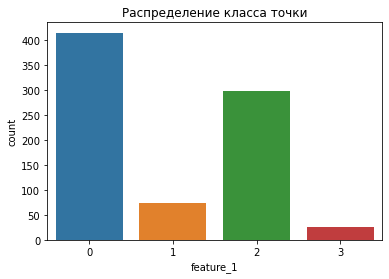

In [106]:
sns.countplot(x = "feature_1" , data  = df1).set_title('Распределение класса точки')

## Удалим признак ID

In [107]:
X_1 =  df1.drop(['feature_0','feature_1'], axis = 1).iloc[:550, :]

In [108]:
y_1 = df1[['feature_1']].iloc[:550, :]

In [109]:
X_1

,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_12,...,feature_28_ОРГ2-02458,feature_28_ОРГ2-02482,feature_28_ОРГ2-03119,feature_28_ОРГ2-04561,feature_28_ОРГ2-05237,feature_28_ОРГ2-05294,feature_28_ОРГ2-06006,feature_28_ОРГ2-06329,feature_28_ОРГ2-09100,feature_28_ОРГ_неизв
0,1,546.0,546.0,0.0,26.778333,0.000000,0.178522,0.000000,75.0,75.0,...,0,0,0,0,0,0,0,0,0,1
1,1,1902.0,1902.0,0.0,49.934722,0.000000,0.120907,0.000000,223.0,190.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,1,7.0,7.0,0.0,0.046389,0.000000,0.015463,0.000000,1.0,2.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
546,1,4570.0,4234.0,336.0,184.639444,6.781389,0.318894,0.072918,303.0,276.0,...,0,0,0,0,0,0,0,0,0,1
547,1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
548,1,3917.0,3638.0,279.0,133.649722,5.305556,0.285576,0.096465,251.0,217.0,...,0,0,0,0,0,0,0,0,0,1


In [110]:
X_pred = df1.drop(['feature_0','feature_1'], axis = 1).iloc[550:, :]
X_pred

,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_12,...,feature_28_ОРГ2-02458,feature_28_ОРГ2-02482,feature_28_ОРГ2-03119,feature_28_ОРГ2-04561,feature_28_ОРГ2-05237,feature_28_ОРГ2-05294,feature_28_ОРГ2-06006,feature_28_ОРГ2-06329,feature_28_ОРГ2-09100,feature_28_ОРГ_неизв
550,1,4.0,4.0,0.0,0.110278,0.000000,0.036759,0.000000,0.0,3.0,...,0,0,0,0,0,0,0,0,0,1
551,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
552,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
553,1,8163.0,8134.0,29.0,347.558889,0.711111,0.320331,0.054701,760.0,325.0,...,0,0,0,0,0,0,0,0,0,0
554,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,1,1404.0,1357.0,47.0,38.189167,1.141944,0.103775,0.051907,218.0,150.0,...,0,0,0,0,0,0,0,0,0,1
808,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
809,1,5103.0,5103.0,0.0,127.484722,0.000000,0.163442,0.000000,496.0,284.0,...,0,0,0,0,0,0,0,0,0,0
810,1,1251.0,1248.0,3.0,23.959722,0.020833,0.071522,0.010417,205.0,130.0,...,0,0,0,0,0,0,0,0,0,1


## Используем SMOTE для уравновешивания классов

In [ ]:
%%time

In [111]:
ada = SMOTE(random_state =42, n_jobs = -1)
X_res, y_res = ada.fit_resample(X_1, y_1)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=17)

## Модель XGBClassifier

In [113]:
model = XGBClassifier(n_jobs=-1, random_state=17, num_class = 4)
xgbc= model.fit(X_train, y_train)
xgbc.score(X_test, y_test)

0.803347280334728

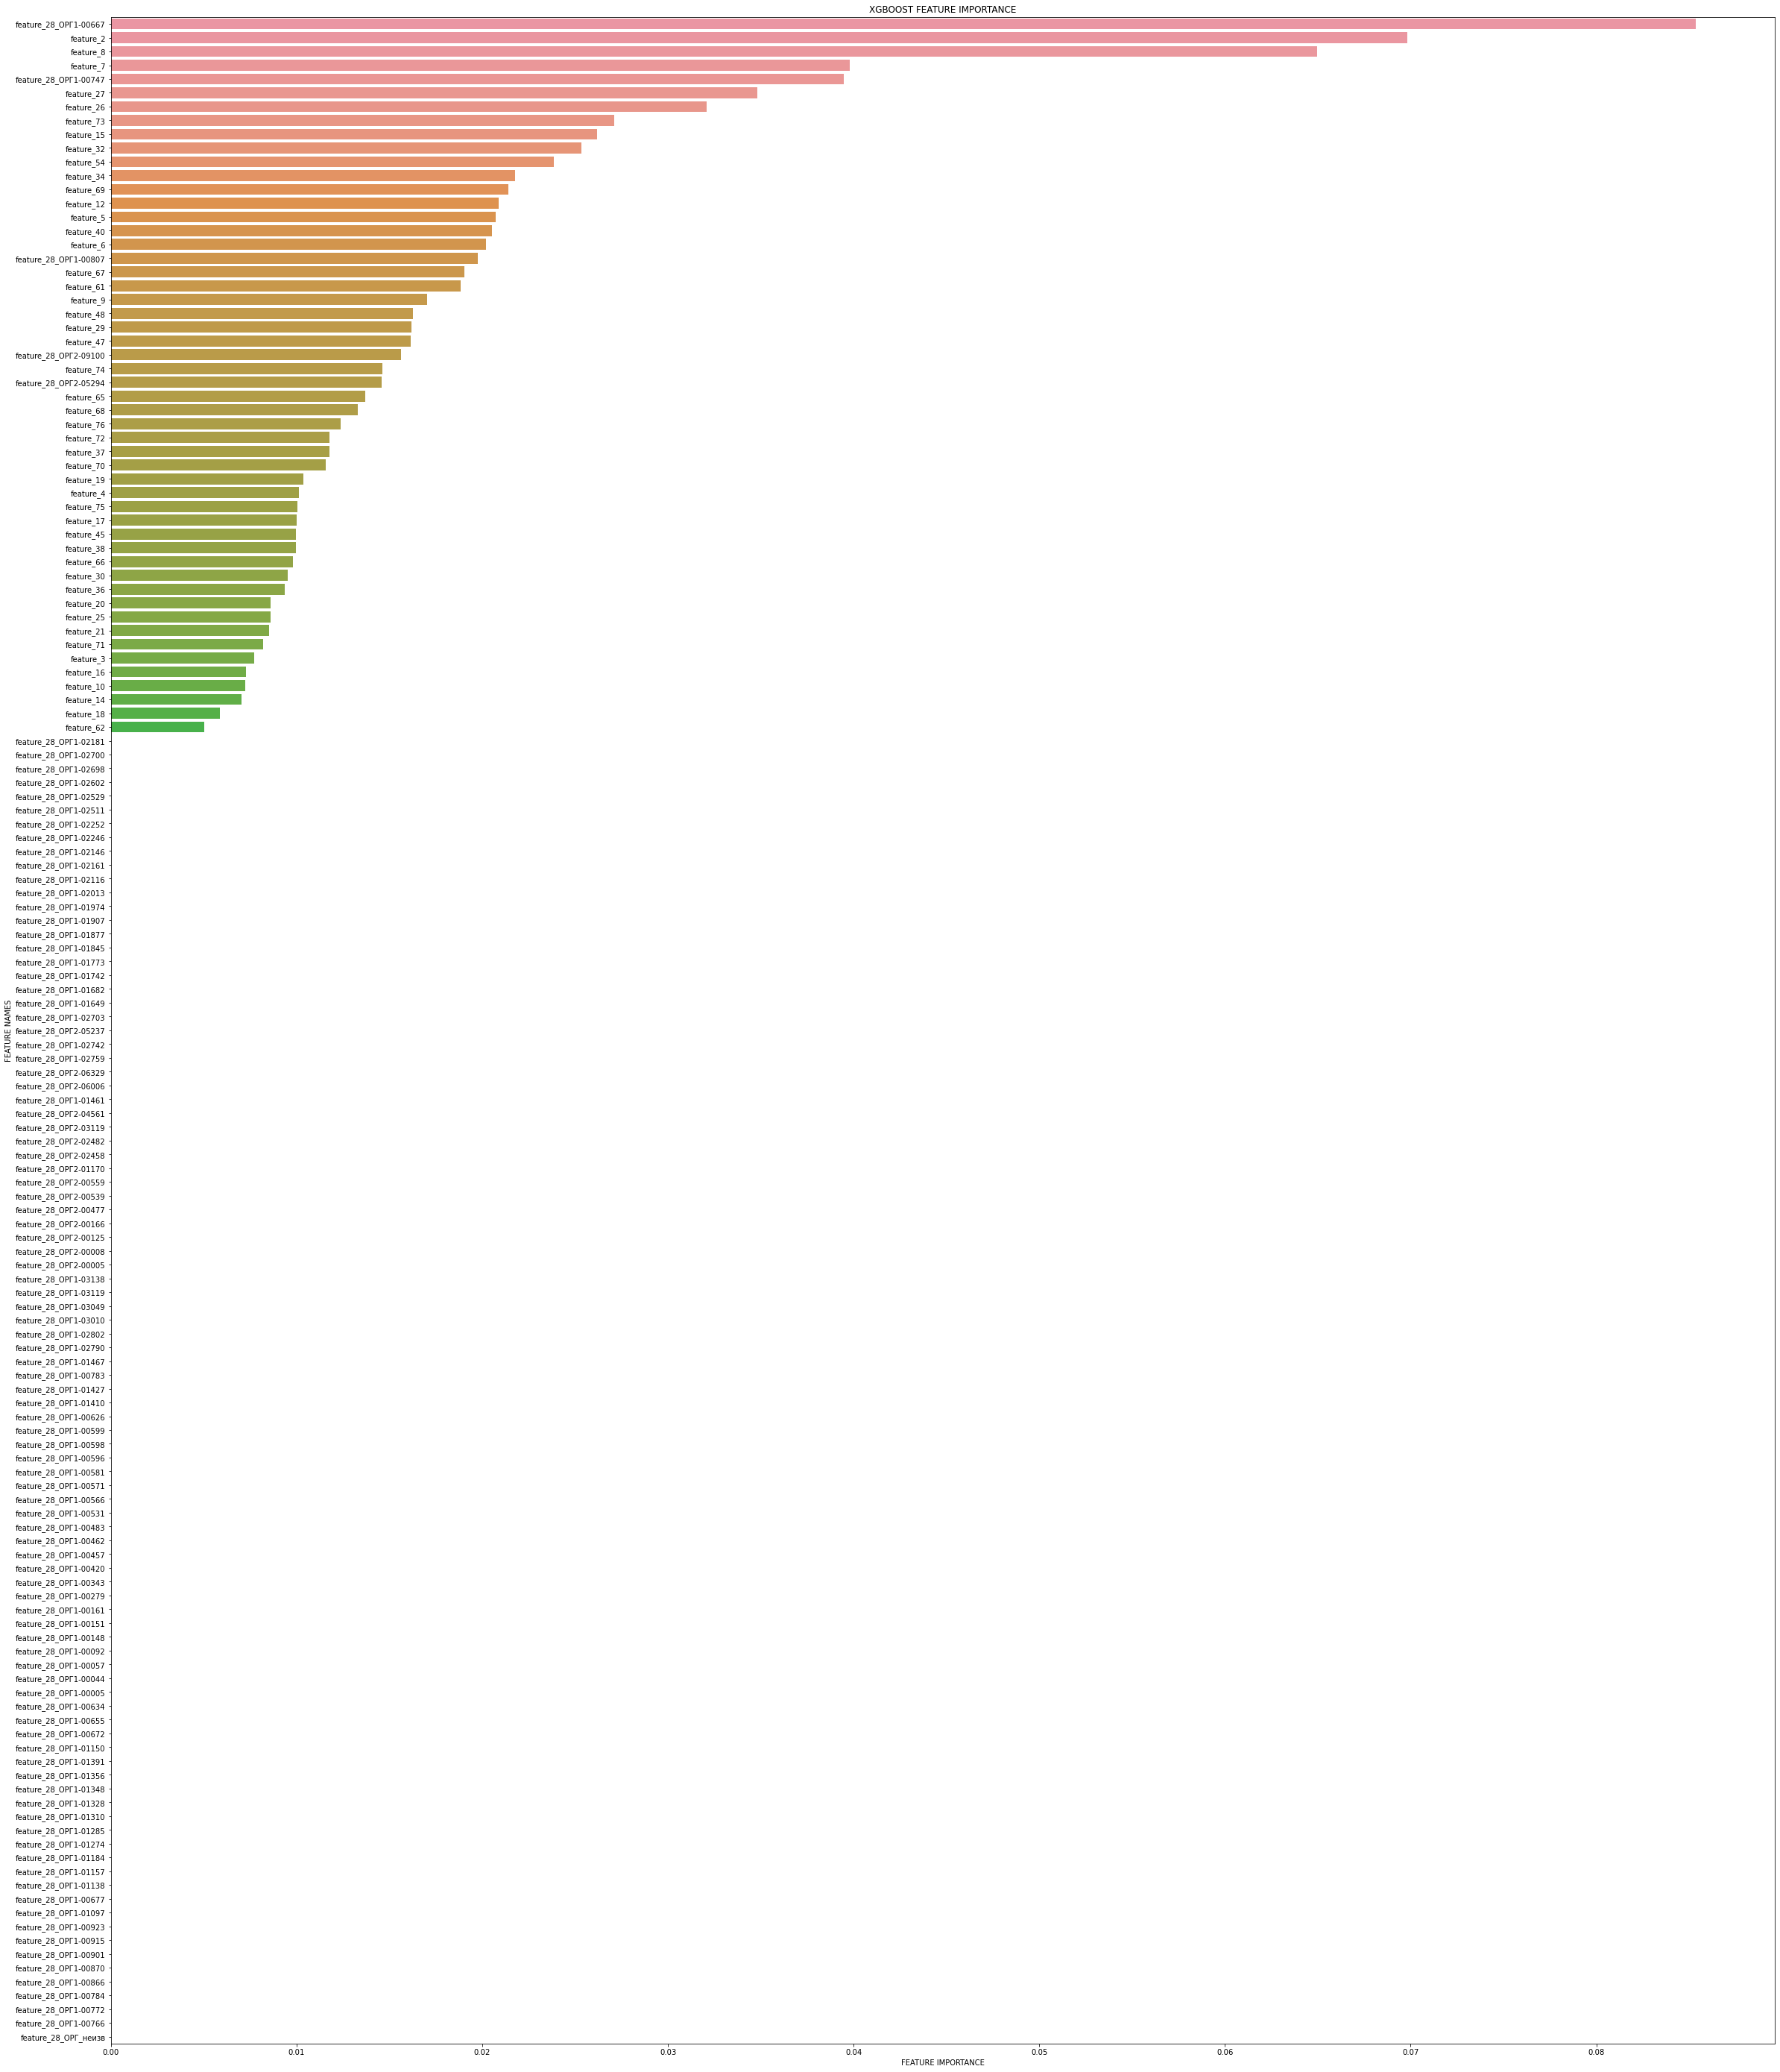

In [114]:
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    data={'feature_names':feature_names,
          'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data) 
    fi_df.sort_values(by=['feature_importance'],    
                     ascending=False,inplace=True)
    plt.figure(figsize=(40,50))
    sns.barplot(x=fi_df['feature_importance'], 
               y=fi_df['feature_names'])
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()
    
plot_feature_importance(xgbc.feature_importances_, X_train.columns,'XGBOOST')

In [116]:
sample_1 = test_df.copy()

In [117]:
sample_1['type'] = xgbc.predict(X_pred)

In [118]:
sample_1.to_csv('sample1.csv', index=False)

In [119]:
sample_1

,id,type
0,ОРГ1-02649,2
1,ОРГ2-05929,0
2,ОРГ2-05859,2
3,ОРГ1-00279,0
4,ОРГ2-01613,0
...,...,...
257,ОРГ1-02893,2
258,ОРГ2-01077,1
259,ОРГ1-00469,2
260,ОРГ1-02060,2


## Score: 0.432194 

In [ ]:
0.8117154811715481 SCORE 0.417196

In [ ]:
## Без SMOTE  
## 0.8741258741258742  SKORE 0.36

In [ ]:
# Везде использовался SMOTE

In [ ]:
0.803347280334728 Score = 0.432194 

In [ ]:
0.8044692737430168 SCORE при test = 0.15 Score 0.397222

In [ ]:
0.7949790794979079 при test = 0.2 Score 0.424849

In [ ]:
0.770949720670391 при test = 0.3 SCORE 0.405364